## Homework 2

### Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib

### Загрузка данных и первичный осмотр

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
df = pd.read_csv('S02-hw-dataset.csv')   # загрузка датасета

print("Первые 5 строк: ")
display(df.head())

print("\nИнформацию о столбцах и типах:\n")
df.info()

print("\n\nБазовые описательные статистики:")
display(df.describe())

Первые 5 строк: 


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информацию о столбцах и типах:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


Базовые описательные статистики:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### Контроль качества (Пропуски и дубликаты)

In [33]:
print("Доля пропусков в столбцах:")
print(df.isna().mean())

duplicates = df.duplicated().sum()
print(f"\nКоличество полных дубликатов: {duplicates}")

strange_age = df[(df['age'] > 100) | (df['age'] < 0)]
strange_purchases = df[(df['purchases'] < 0) | (df['revenue'] < 0)]

print("\nПодозрительный возраст:")
display(strange_age)

print("\nПодозрительная покупки или выручка:")
display(strange_purchases)

print("-" * 20)

Доля пропусков в столбцах:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество полных дубликатов: 1

Подозрительный возраст:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Подозрительная покупки или выручка:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


--------------------


Выводы:
- В столбце 'age' есть пустые значения
- Есть записи с отрицательными значениями количеством покупок и возврастом

### Базовый EDA: группировки, агрегаты и частоты

In [34]:
print("Распределение пользователей по странам (value_counts):")  # частоты для категориальной переменной(Страна)
country_counts = df['country'].value_counts()
display(country_counts)

bins  = [0, 18, 30, 50, 100]                                     # создание дополнительных «коридоров»
labels = ['Дети (<18)', 'Молодежь (19-30)', 'Взрослые (31-50)', 'Пожилые (50+)']

df['age_group'] = pd.cut(df['age'], bins =bins , labels=labels) # создаём новый столбец
print("\nРаспределение по возрастным группам:")
display(df['age_group'].value_counts().sort_index())

df_clean = df[df['purchases'] >= 0]

geo_stats = df_clean.groupby('country').agg({
    'revenue': ['count', 'mean', 'sum'],                        # Сколько людей, средняя выручка, общая сумма
    'purchases': 'mean'                                         # Среднее кол-во покупок
})

print("\nСводная таблица по странам (Revenue и Purchases):")
display(geo_stats.round(2))

print("\nРазмер покупок по возрасту:")
age_stats = df_clean.groupby('age_group', observed=False)['revenue'].mean().round(2)
display(age_stats)

Распределение пользователей по странам (value_counts):


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Распределение по возрастным группам:


age_group
Дети (<18)           2
Молодежь (19-30)    13
Взрослые (31-50)    17
Пожилые (50+)        6
Name: count, dtype: int64


Сводная таблица по странам (Revenue и Purchases):


revenue                 purchases
          count     mean    sum      mean
country                                  
CN            2  1054.00   2108      4.50
DE            6  1445.50   8673      6.50
FR           11   666.00   7326      4.73
RU           13   790.08  10271      4.77
US            8   557.38   4459      4.62


Размер покупок по возрасту:


age_group
Дети (<18)          1296.00
Молодежь (19-30)     565.54
Взрослые (31-50)    1022.76
Пожилые (50+)        596.67
Name: revenue, dtype: float64

Выводы:
-Больше всего пользователей из России, далее Франция 
- Основная аудитория - это взрослые (31-50 лет, 17 чел.) и молодежь (19-30 лет, 13 чел.)
- По суммарной выручке лидирует Россия, возможно из-за большего колчества пользователей
- Но странна с самым высоким средним чеком и количеством покупок - Германия
- При разбивке по возрасту самую высокую среднюю выручку показала группа "Дети (<18)", что странно т.к. таких пользователе1 меньше всего (2). Возможно выброс

###  Визуализация данных в Matplotlib

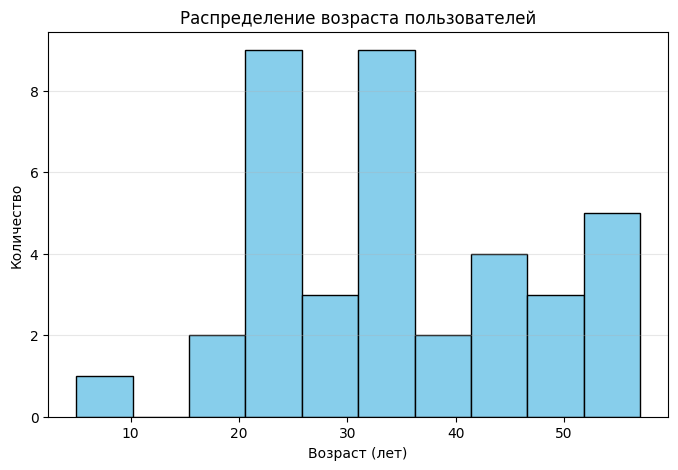

График 1 сохранен: figures/hist_age.png



C:\Users\MaRiN\AppData\Local\Temp\ipykernel_11616\2541796325.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries)


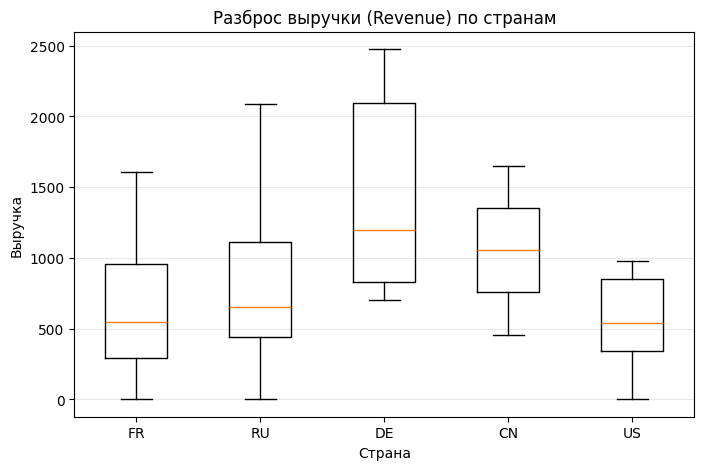

График 2 сохранен: figures/boxplot_revenue.png



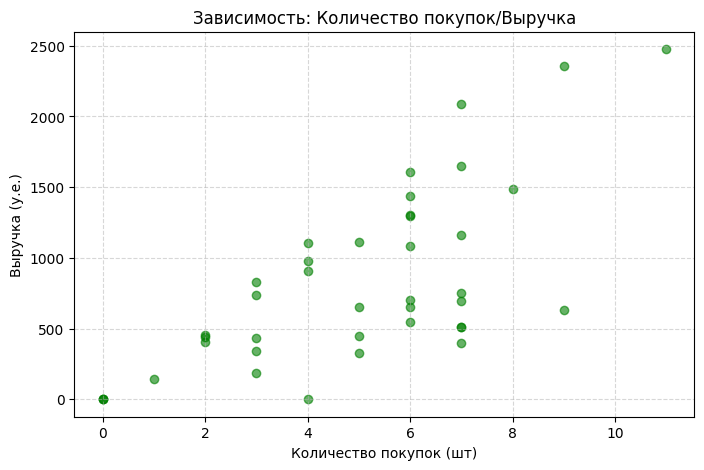

График 3 сохранен: figures/scatter_purchases_revenue.png



In [35]:
# Подготовка данных (убираем ошибки для графиков)
df_plot = df[df['purchases'] >= 0].copy()

# гистограмма (возраст пользователей)
plt.figure(figsize=(8, 5))       # Размер картинки
plt.hist(df_plot['age'].dropna(), bins=10, color='skyblue', edgecolor='black')

plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст (лет)')
plt.ylabel('Количество')
plt.grid(axis='y', alpha=0.3)

# сохраняем и выводим резульат
save_path_1 = 'figures/hist_age.png'
plt.savefig(save_path_1)
plt.show()
print(f"График 1 сохранен: {save_path_1}\n")

# boxplot по странам
plt.figure(figsize=(8, 5))

countries = df_plot['country'].unique()
data_to_plot = [df_plot[df_plot['country'] == c]['revenue'] for c in countries]

plt.boxplot(data_to_plot, labels=countries)

plt.title('Разброс выручки (Revenue) по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.grid(axis='y', alpha=0.3)

save_path_2 = 'figures/boxplot_revenue.png'
plt.savefig(save_path_2)
plt.show()
print(f"График 2 сохранен: {save_path_2}\n")


# scatter plot по покупкам и выручке
plt.figure(figsize=(8, 5))

plt.scatter(df_plot['purchases'], df_plot['revenue'], color='green', alpha=0.6)

plt.title('Зависимость: Количество покупок/Выручка')
plt.xlabel('Количество покупок (шт)')
plt.ylabel('Выручка (у.е.)')
plt.grid(True, linestyle='--', alpha=0.5)

save_path_3 = 'figures/scatter_purchases_revenue.png'
plt.savefig(save_path_3)
plt.show()
print(f"График 3 сохранен: {save_path_3}\n")

Выводы:
1. Гистограмма (Возраст) - показывает количество групп пользователей разных возрастов

2. Boxplot (Выручка по странам) - выводит разницу средний чек по регионам

3. Scatter Plot (Покупки vs Выручка) - показывает зависимость выручки от количества покупок